# Анализ данных
Sberbank-Russian-Housing-Market


In [15]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from tqdm import tqdm
from sklearn import preprocessing 

In [16]:
df = pd.read_csv("train.csv", parse_dates=['timestamp'])

In [17]:
df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [18]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
macro = pd.read_csv('macro.csv')

train_test = pd.concat([train, test])

df = pd.merge_ordered(train_test, macro, on='timestamp', how='left')

In [19]:
df.columns[50:200]

Index(['ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male',
       '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all',
       ...
       'cafe_count_1000_price_2500', 'cafe_count_1000_price_4000',
       'cafe_count_1000_price_high', 'big_church_count_1000',
       'church_count_1000', 'mosque_count_1000', 'leisure_count_1000',
       'sport_count_1000', 'market_count_1000', 'green_part_1500'],
      dtype='object', length=150)

In [20]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,38133.000000,38133.000000,30574.000000,37966.000000,28561.000000,28561.000000,2.347900e+04,28561.000000,28561.000000,23880.000000,...,753.0,34150.000000,13570.000000,34150.000000,13570.000000,34150.000000,27232.000000,13570.000000,27232.000000,34150.000000
mean,19068.933994,54.111172,34.033460,7.667123,12.567592,1.834390,2.716785e+03,1.900844,6.543995,2.071650,...,271.0,9858.805534,615.001326,0.448634,1382.187988,377110.477218,26.677108,72.552108,44910.638807,230130.924422
std,11008.303803,35.171162,47.581529,5.276156,6.730496,1.490923,1.308521e+05,0.847620,27.571630,0.864795,...,0.0,874.275085,16.575729,0.006529,70.691413,60143.588266,2.016525,4.433342,3854.550878,3036.578797
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,271.0,6943.000000,565.000000,0.439390,1240.000000,269768.000000,22.370000,64.120000,23587.000000,226047.300000
25%,9536.000000,38.900000,20.000000,3.000000,9.000000,1.000000,1.966000e+03,1.000000,1.000000,1.000000,...,271.0,9350.000000,603.000000,0.447840,1309.000000,329348.000000,26.700000,67.850000,46080.000000,229294.800000
50%,19069.000000,50.000000,30.000000,7.000000,12.000000,1.000000,1.980000e+03,2.000000,6.000000,2.000000,...,271.0,10311.000000,627.000000,0.447840,1440.000000,398451.000000,28.200000,76.200000,46080.000000,229294.800000
75%,28602.000000,63.000000,43.000000,11.000000,17.000000,2.000000,2.006000e+03,2.000000,9.000000,3.000000,...,271.0,10311.000000,627.000000,0.450700,1440.000000,398451.000000,28.200000,76.200000,46352.000000,232840.200000
max,38135.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,271.0,10805.000000,627.000000,0.458880,1440.000000,463938.000000,28.200000,76.200000,46352.000000,234576.900000


# Посмотрим на количество пропусков в данных

In [21]:
pd.isnull(df[df.columns[df.isnull().any()].tolist()]).sum().sort_values(ascending=False)

provision_retail_space_modern_sqm         37380
provision_retail_space_sqm                32541
load_of_teachers_preschool_per_teacher    24563
students_reg_sports_share                 24563
theaters_viewers_per_1000_cap             24563
                                          ...  
railroad_station_walk_km                     59
metro_km_walk                                59
metro_min_walk                               59
product_type                                 33
green_part_2000                              19
Length: 119, dtype: int64

<AxesSubplot:>

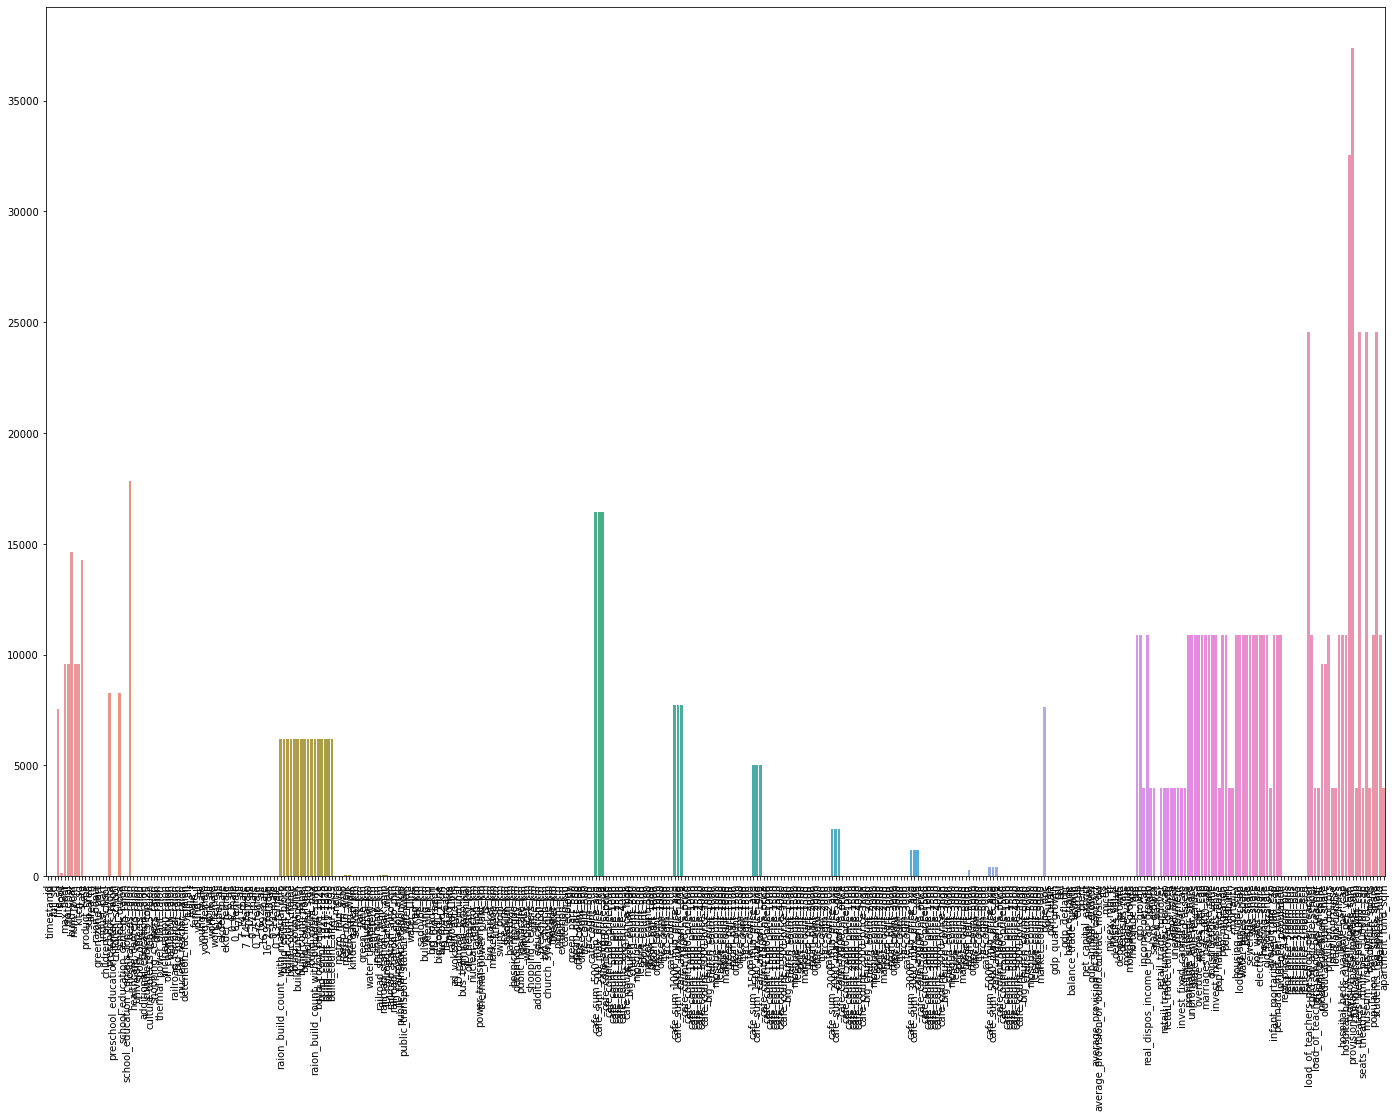

In [22]:
#Визуализируем пропуски
f, ax = plt.subplots(figsize=(24, 16))
plt.xticks(rotation='vertical')
sns.barplot(y=df.isna().sum(),x = df.columns)

Пропусков достачно много.

# Посмотрим распределение целевой переменной

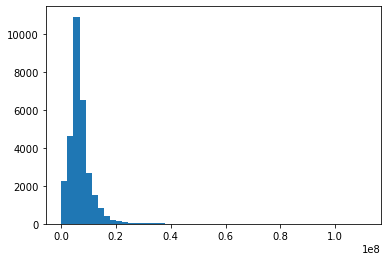

In [23]:
plt.hist(df['price_doc'], bins = 50)
plt.show()

In [35]:
#Max Price details
df[df.price_doc==df.price_doc.max()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
2118,2121,2012-05-10,55.0,31.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,8522.0,603.0,0.4507,1309.0,288177.0,23.01,67.85,42551.0,232840.2


In [34]:
df.price_doc[df.sub_area == 'Teplyj Stan'].describe()

count    1.650000e+02
mean     8.563558e+06
std      8.877605e+06
min      9.900000e+05
25%      6.200000e+06
50%      7.800000e+06
75%      1.000000e+07
max      1.111111e+08
Name: price_doc, dtype: float64

In [36]:
#Min Price details
df[df.price_doc==df.price_doc.min()]


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
20244,20247,2014-06-27,72.0,37.0,11.0,16.0,1.0,2006.0,2.0,12.0,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8


# Изучим зависимость целевой переменной от очевидных признаков квартир

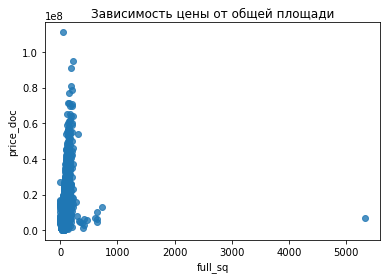

In [24]:
sns.regplot(x = 'full_sq', y = 'price_doc', data = df, fit_reg = False)
plt.title('Зависимость цены от общей площади')
plt.show()

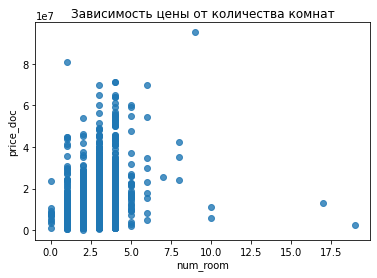

In [25]:
sns.regplot(x = 'num_room', y = 'price_doc', data = df, fit_reg = False)
plt.title('Зависимость цены от количества комнат')
plt.show()

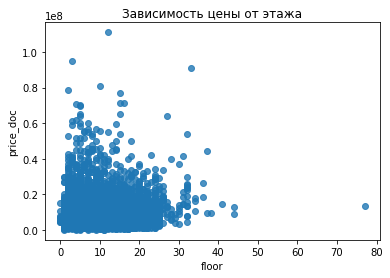

In [26]:

sns.regplot(x = 'floor', y = 'price_doc', data = df, fit_reg = False)
plt.title('Зависимость цены от этажа')
plt.show()

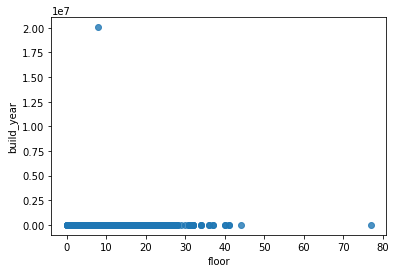

In [27]:

sns.regplot(x = 'floor', y = 'build_year', data = df, fit_reg = False)
plt.show()

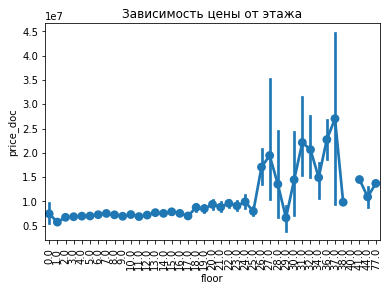

In [40]:
temp_df = df.groupby(['floor'])['price_doc'].aggregate(np.median).reset_index()
sns.pointplot(x='floor', y='price_doc', data=df)
plt.xticks(rotation='vertical')
plt.title('Зависимость цены от этажа')
plt.show()

Из этого графика можно сделать вывод, что средняя цена для всех квартир одинакова, квартира, на 33 этаже, имеет самую высокую среднюю цену, скорее всего это выброс. Удалим его из датасета

In [29]:
#we have noize over here on the 33th floor, so lets drop it

df[(df['floor']) == 33]['id']

7457    7460
Name: id, dtype: int64

In [30]:
df.drop(df.index[7457], inplace=True)

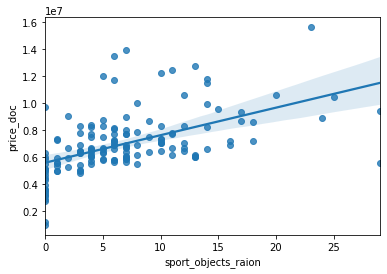

In [31]:
train_sportsgrp = df.groupby('sub_area')[['sport_objects_raion', 'price_doc']].median()
sns.regplot(x = 'sport_objects_raion', y = 'price_doc', data = train_sportsgrp, ci = 95)
plt.show()

# Проверим средние цены по годам и месяцам

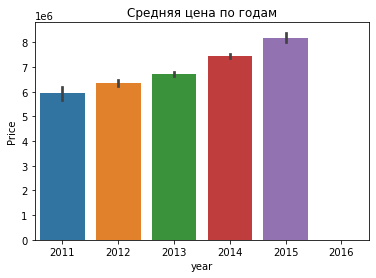

In [43]:
df['year'] = df['timestamp'].map(lambda x: x[0:4])

sns.barplot(x='year', y='price_doc', data=df)

plt.ylabel('Price')
plt.title('Средняя цена по годам')
plt.show()

Цена по годам растет.

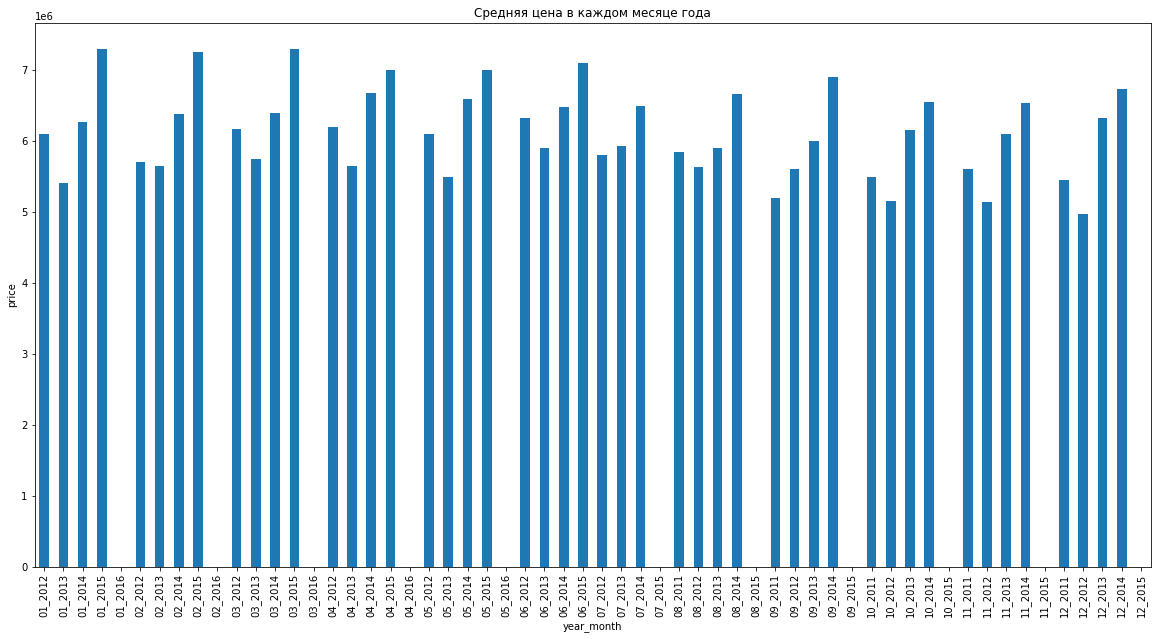

In [42]:
df['year_month'] = df['timestamp'].map(lambda x: x[5:7]+'_'+x[0:4])

plt.figure(figsize=(20,10))
df.price_doc.groupby(df.year_month).median().plot.bar()
plt.ylabel('price')
plt.title('Средняя цена в каждом месяце года')
plt.show()

In [25]:
df.corr()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
id,1.000000,0.010940,-0.001504,-0.015358,0.006795,0.006884,-0.011108,-0.002527,0.001583,-0.106120,...,NaN,0.906107,0.815762,0.582711,0.866281,0.955011,0.854095,0.866776,0.477327,0.430802
full_sq,0.010940,1.000000,0.181898,0.090808,0.129612,0.039400,-0.005233,0.702255,0.023660,-0.077838,...,NaN,0.019021,0.010605,0.015152,0.004117,0.017996,0.005426,0.003457,0.017054,0.016688
life_sq,-0.001504,0.181898,1.000000,0.043729,0.051512,0.016672,-0.002326,0.212143,0.002649,-0.062890,...,NaN,0.010509,0.024968,-0.008260,0.024845,0.007066,0.010043,0.024690,0.017919,-0.007872
floor,-0.015358,0.090808,0.043729,1.000000,0.443047,-0.004847,0.000821,-0.008977,-0.004179,-0.107982,...,NaN,-0.012293,0.049552,-0.024110,0.038829,-0.019933,-0.014033,0.037572,0.026368,-0.014821
max_floor,0.006795,0.129612,0.051512,0.443047,1.000000,0.069189,-0.000102,-0.007301,0.028181,-0.055249,...,NaN,0.002731,NaN,0.004335,NaN,0.003837,-0.001900,NaN,0.001900,0.004617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bandwidth_sports,0.955011,0.017996,0.007066,-0.019933,0.003837,0.015033,-0.012582,0.004589,-0.005574,-0.122999,...,NaN,0.949557,0.942503,0.608410,0.999551,1.000000,0.930890,1.000000,0.521896,0.449337
population_reg_sports_share,0.854095,0.005426,0.010043,-0.014033,-0.001900,-0.012697,-0.015584,-0.000414,-0.019222,-0.051881,...,NaN,0.943084,0.899993,-0.288471,0.990181,0.930890,1.000000,0.993942,0.640756,-0.530126
students_reg_sports_share,0.866776,0.003457,0.024690,0.037572,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.917645,0.942448,-0.997038,0.999546,1.000000,0.993942,1.000000,0.738362,-0.936501
apartment_build,0.477327,0.017054,0.017919,0.026368,0.001900,0.012697,0.015584,0.000414,0.019222,0.051881,...,NaN,0.736763,0.921357,-0.472179,0.758342,0.521896,0.640756,0.738362,1.000000,-0.390780


# Посмотрим на корреляцию цены от признаков расстояния до объектов

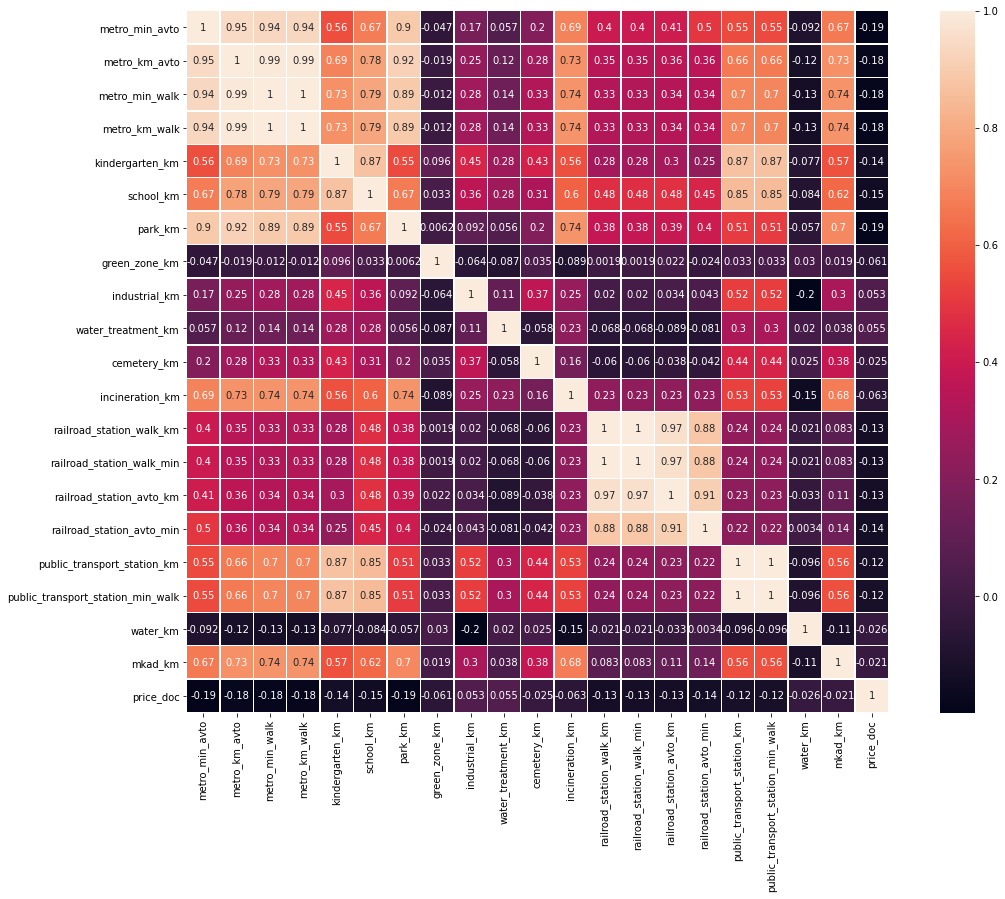

In [26]:
#distances corr
km_chars = ['metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 'public_transport_station_min_walk', 'water_km', 'mkad_km', 'price_doc']


corrmat1 = df[km_chars].corr()

plt.subplots(figsize=(18, 15))
sns.heatmap(corrmat1, square=True, linewidths=.5, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.subplots_adjust(top = 0.95, bottom = 0.3, left = 0.2, right = 1)
plt.show()




Наибольшее влияние на цену оказывают расстояния до бассейна. На удивление расстояние до метро мало влияет на цену.

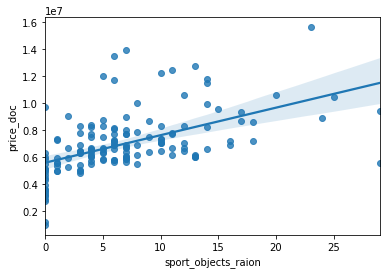

In [32]:
train_sportsgrp = df.groupby('sub_area')[['sport_objects_raion', 'price_doc']].median()
sns.regplot(x = 'sport_objects_raion', y = 'price_doc', data = train_sportsgrp, ci = 95)
plt.show()

# Посмотрим на корреляцию цены от наличия в районе образовательных учреждений

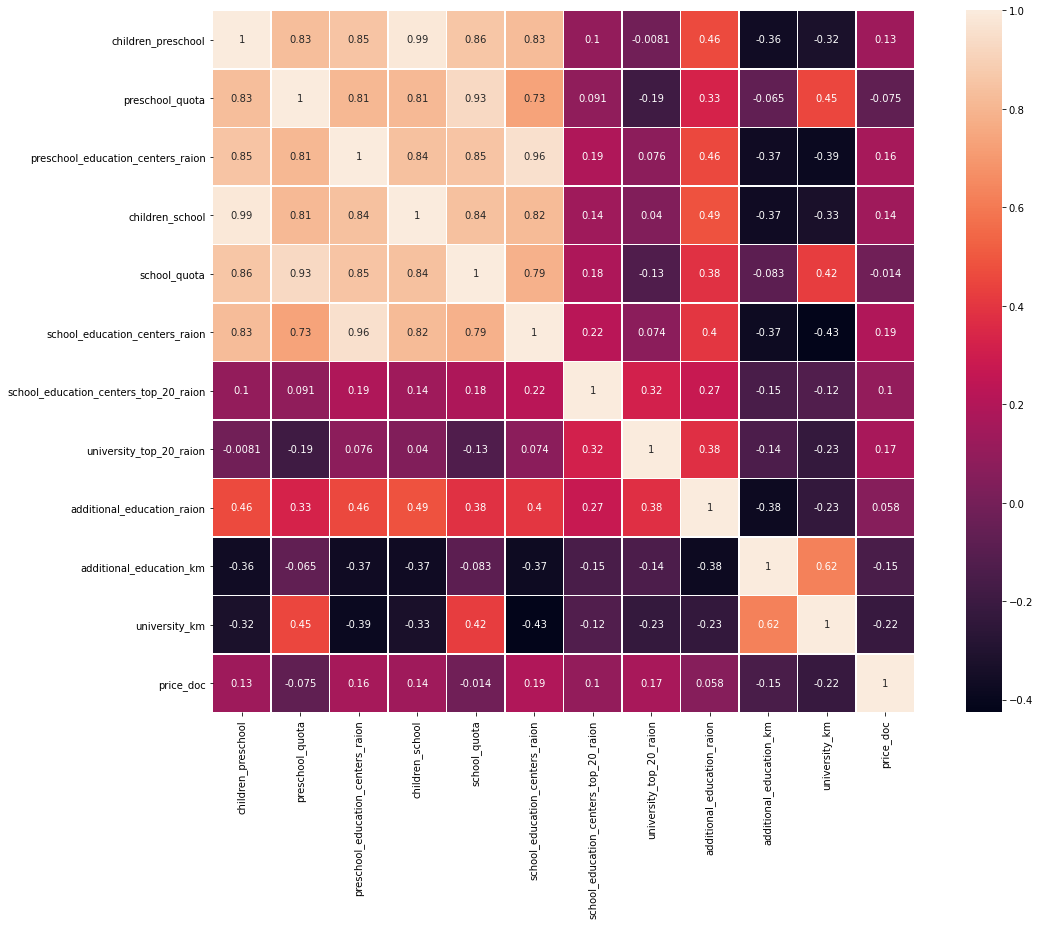

In [28]:
#corr for education
school_chars = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 
                'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 
                'university_top_20_raion', 'additional_education_raion', 'additional_education_km', 'university_km', 'price_doc']
corrmat1 = df[school_chars].corr()

plt.subplots(figsize=(18, 15))
sns.heatmap(corrmat1, square=True, linewidths=.5, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.subplots_adjust(top = 0.95, bottom = 0.3, left = 0.2, right = 1)
plt.show()

В данном случае мы видим большое значение отдается наличию школы

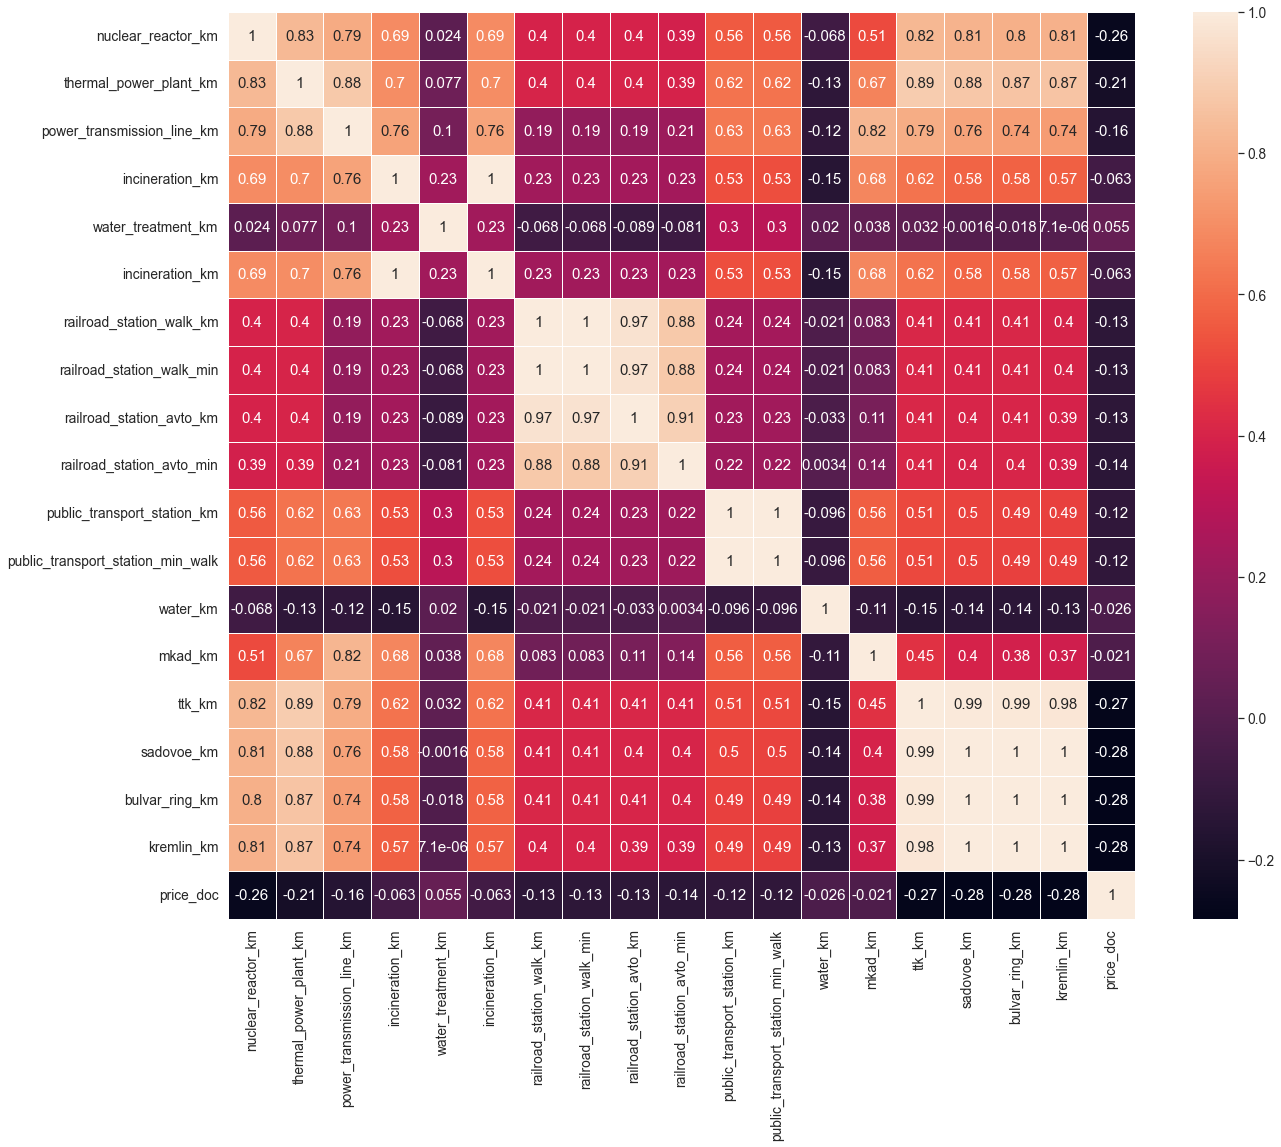

In [25]:
#ecosystem corr

inf_features = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km', 'incineration_km',
                'water_treatment_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 
                'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 
                'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km',
                'kremlin_km', 'price_doc']
corrmat2 = df[inf_features].corr()

sns.set(font_scale=1.25)

plt.subplots(figsize=(20, 18))
sns.heatmap(corrmat2, square=True, linewidths=.5, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.subplots_adjust(top = 0.95, bottom = 0.25, left = 0.2, right = 1)
plt.show()

# Посмотрим в каком районе самая высокая средняя цена продажи.

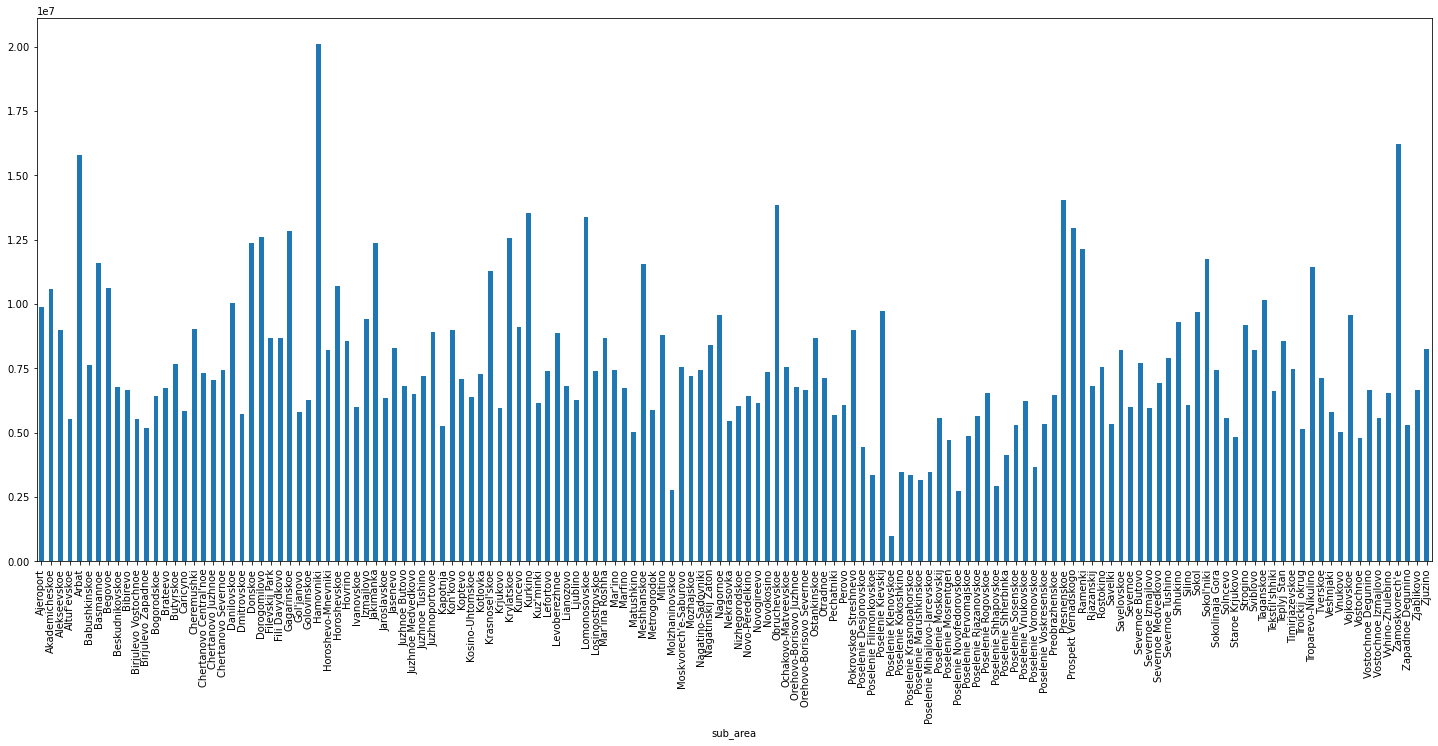

In [39]:
plt.figure(figsize=(25,10))
df.price_doc.groupby(df.sub_area).mean().plot.bar()
plt.show()

Район с самой высокой средней ценой - Хамовники, а самая низкая средняя цена - село Кленовское, мы можем видеть это на графике